In [ ]:
import coco_text
import os, glob, sys, shutil
import math
from multiprocessing import Pool
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:
ct = coco_text.COCO_Text('data/coco/COCO_Text.json')

In [ ]:
ct.info()

# Analyze train dataset

In [ ]:
anns_train = ct.loadAnns(ct.getAnnIds(imgIds = ct.train, catIds = [('legibility','legible')]))
anns_area = [i['area'] for i in anns_train]

In [ ]:
from collections import Counter
classes = [i['class'] for i in anns_train]
count = Counter(classes)
print(count)

In [ ]:
plt.bar(count.keys(), count.values(), 1, color='g')

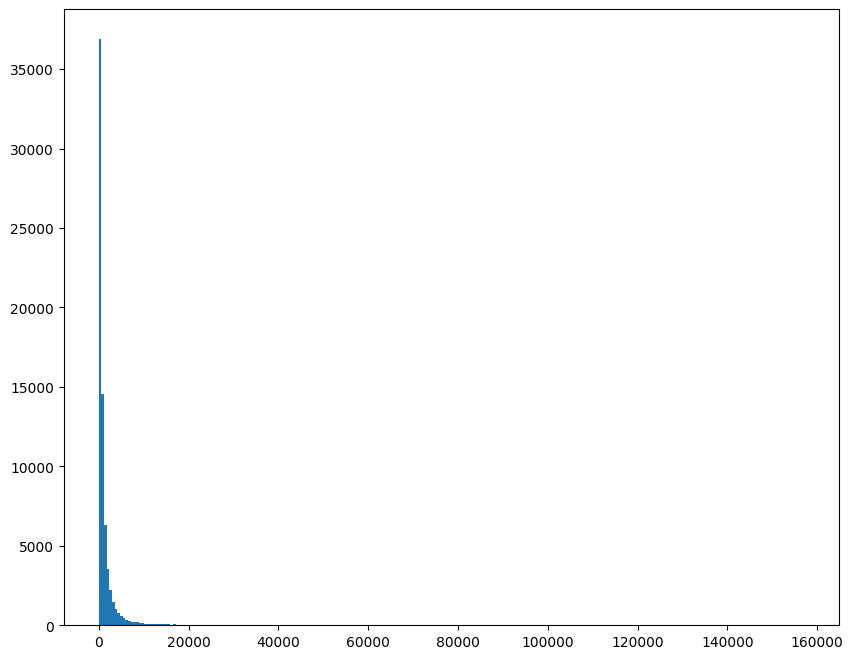

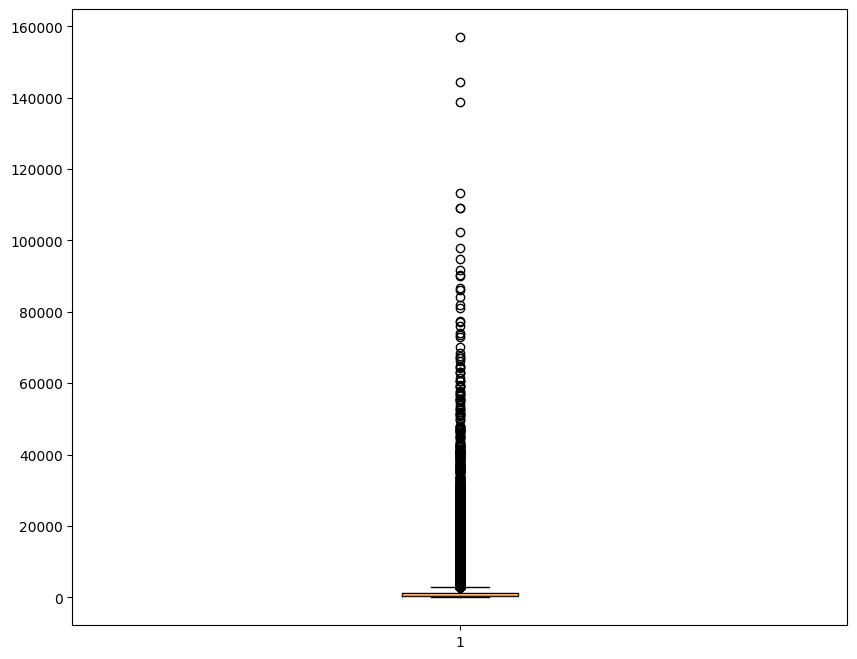

1476.6449322680348
14307393.982176632
156933.45923427888
0.0


In [117]:
bins_width = int(math.sqrt(len(anns_train)))
# print(bins_width)
plt.hist(anns_area, bins = bins_width, range = (np.min(anns_area), np.max(anns_area)))
plt.show()
plt.boxplot(anns_area)
plt.show()
print(np.mean(anns_area))
print(np.var(anns_area))
print(np.max(anns_area))
print(np.min(anns_area))

# Extract train data

In [ ]:
# img_coco_text_train = []
# img_true_coco_train = os.listdir('data/coco/train2014')
# 
# for i in ct.loadImgs(imgIds):
#     if i['file_name'] in img_true_coco_train:
#         img_coco_text_train_filename.append(i['file_name'])
#         anns = []
#         for ann in ct.loadAnns(ct.getAnnIds(imgIds = i['id'], catIds = [('legibility','legible'), ('class','machine printed')])):
#             left, top, w, h = ann['bbox']
#             width, height = i['width'], i['height']
#             xywh = [(left + w / 2) / width, (top + h / 2) / height, w / width, h / height]
#             line = 0, *xywh  # YOLO format (class_index, xywh)
#             ann_filename = i["file_name"].split('.jpg')[0]
#             with open(f'data/coco/labels/train/{ann_filename}.txt', 'a') as f:
#                 f.write(("%g " * len(line)).rstrip() % line + "\n")
        

In [ ]:
def JSON2YOLO(coco_train, true_train):
    # print(coco_train['file_name'])
    temp_filename = []
    # for i in coco_train:
    if coco_train['file_name'] in true_train:
        temp_filename.append(coco_train['file_name'])
        # anns = []
        for ann in ct.loadAnns(ct.getAnnIds(imgIds = coco_train['id'], catIds = [('legibility','legible'), ('class','machine printed')])):
            left, top, w, h = ann['bbox']
            width, height = coco_train['width'], coco_train['height']
            xywh = [(left + w / 2) / width, (top + h / 2) / height, w / width, h / height]
            line = 0, *xywh  # YOLO format (class_index, xywh)
            ann_filename = coco_train["file_name"].split('.jpg')[0]
            with open(f'data/coco/labels/train/{ann_filename}.txt', 'a') as f:
                f.write(("%g " * len(line)).rstrip() % line + "\n")
    return temp_filename

In [ ]:
# get all images containing at least one instance of legible text
imgIds = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible'), ('class','machine printed')])
img_true_coco_train = os.listdir('data/coco/train2014')
img_coco_text_train = ct.loadImgs(imgIds)
img_coco_text_train_filename = []
items = [(i, img_true_coco_train) for i in img_coco_text_train]
with Pool(processes = 28) as pool:
    print(len(items))
    for results in pool.starmap(JSON2YOLO, items):
        img_coco_text_train_filename.extend(results)

In [ ]:
def movefile(filename):
    old_path = f'data/coco/train2014/{filename}'
    new_path = f'data/coco/images/train/{filename}'
    shutil.move(old_path, new_path)
with Pool(processes = 28) as pool:
    pool.map(movefile, img_coco_text_train_filename)
